This notebook will generate numpy arrays storing "featurized object representations" for all objects in each frame

each numpy array will be three dimensional - (number of frames in the sequence, number of objects, featurized object representation of each object)

In [1]:
import math
import random

import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm_notebook

import phyre

In [2]:
phyre.MAIN_EVAL_SETUPS

('ball_cross_template',
 'ball_within_template',
 'two_balls_cross_template',
 'two_balls_within_template')

In [3]:
eval_setup = 'ball_cross_template'

In [4]:
fold_id =  0
train_tasks, dev_tasks, test_tasks = phyre.get_fold(eval_setup, fold_id)
print(len(train_tasks))
print(len(dev_tasks))
print(len(test_tasks))

1600
400
500


In [5]:
action_tier = phyre.eval_setup_to_action_tier(eval_setup)
print(action_tier)

ball


In [6]:
# you can change the '00002' to something else, it denotes the task-id from the phyre simulator

tasks_2 = [x for x in train_tasks if x.startswith('00002')==True]
print(tasks_2)

['00002:007', '00002:011', '00002:015', '00002:017', '00002:023', '00002:026', '00002:028', '00002:029', '00002:031', '00002:041', '00002:044', '00002:045', '00002:046', '00002:047', '00002:050', '00002:052', '00002:055', '00002:059', '00002:063', '00002:064', '00002:066', '00002:068', '00002:069', '00002:070', '00002:078', '00002:079', '00002:080', '00002:082', '00002:085', '00002:086', '00002:089', '00002:092', '00002:093', '00002:096', '00002:097', '00002:098', '00002:099', '00002:100', '00002:101', '00002:102', '00002:103', '00002:104', '00002:105', '00002:109', '00002:110', '00002:111', '00002:113', '00002:115', '00002:119', '00002:120', '00002:121', '00002:123', '00002:126', '00002:129', '00002:130', '00002:134', '00002:135', '00002:137', '00002:138', '00002:139', '00002:140', '00002:144', '00002:146', '00002:148', '00002:149', '00002:152', '00002:153', '00002:160', '00002:161', '00002:162', '00002:164', '00002:165', '00002:166', '00002:168', '00002:169', '00002:170', '00002:171'

In [7]:
tasks = tasks_2
simulator = phyre.initialize_simulator(tasks, action_tier)

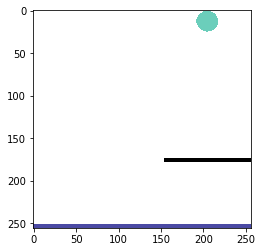

In [8]:
task_index = 0
task_id = simulator.task_ids[task_index]
initial_scene = simulator.initial_scenes[task_index]
plt.imshow(phyre.observations_to_float_rgb(initial_scene))

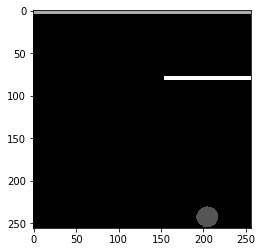

In [9]:
plt.imshow(initial_scene, cmap='gray')

## Figuring out width of Bar

In [10]:
np.unique(initial_scene)

array([0, 2, 4, 6])

In [11]:
width = 0
for i in range(0, 256):
    if initial_scene[i][-1]==6:
        width+=1
    
print(width)

5


In [12]:
phyre.observations_to_float_rgb(initial_scene)

array([[[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       ...,

       [[0.29411765, 0.29019608, 0.64313725],
        [0.29411765, 0.29019608, 0.64313725],
        [0.29411765, 0

Featurized Object Representation, which contains features represented as a 1 x (NUM_SCENE_OBJECTS + TASK_TIER_NUM_USER_INPUTS) x 14 np.ndarray. The features of the object, in order are:

- 1. x in pixels of center of mass divided by SCENE_WIDTH
- 2. y in pixels of center of mass divided by SCENE_HEIGHT
- 3. angle of the object between 0 and 2pi divided by 2pi
- 4. diameter in pixels of object divided by SCENE_WIDTH
- 8. One hot encoding of the object shape, according to order: ball, bar, jar, standing sticks
- 14. One hot encoding of object color, according to order: red, green, blue, purple, gray, black

As the scene is vectorized into prior to user input, the rows represent only scene objects.

In [13]:
initial_featurized_objects = simulator.initial_featurized_objects[task_index]
print(initial_featurized_objects.features.shape)
print(initial_featurized_objects.features)

(1, 3, 14)
[[[0.8        0.31       0.         0.4004997  0.         1.
   0.         0.         0.         0.         0.         0.
   0.         1.        ]
  [0.8        0.9488281  0.         0.09765625 1.         0.
   0.         0.         0.         1.         0.         0.
   0.         0.        ]
  [0.5        0.01       0.         1.0002     0.         1.
   0.         0.         0.         0.         0.         1.
   0.         0.        ]]]


In [14]:
simulator.action_space_dim

3

In [15]:
actions = simulator.build_discrete_action_space(max_actions=1000)

# Random Solved Simulations for TASK-2

You may change the "stride" argument in simulate_action function. It denotes the number of frames to skip

In [16]:
task_index = 0
action = random.choice(actions)
simulation = simulator.simulate_action(task_index, action, need_images=True, need_featurized_objects=True, stride=1)
while(simulation.status!= phyre.simulation_cache.SOLVED):
    action = random.choice(actions)
    simulation = simulator.simulate_action(task_index, action, need_images=True, need_featurized_objects=True, stride=1)

Number of observations returned by simulator: 595


/home/dhruv/anaconda3/envs/phyre/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  import sys


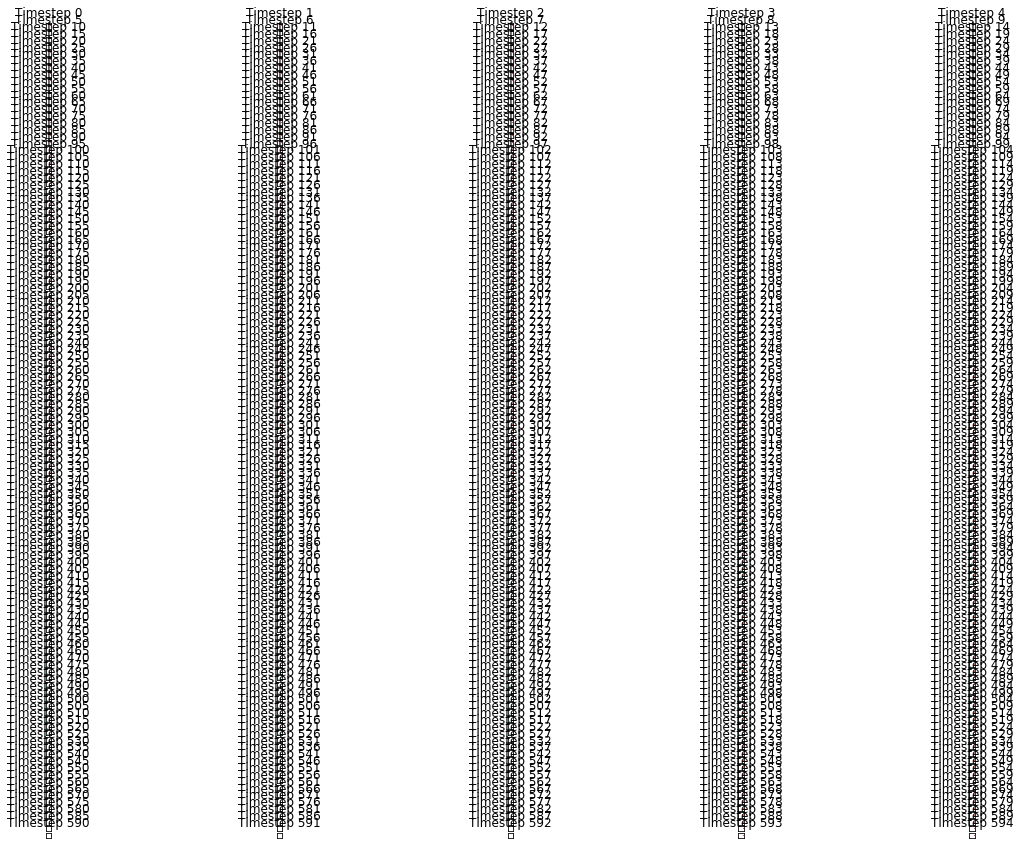

In [17]:
# %matplotlib inline
# print('Number of observations returned by simulator:', len(simulation.images))

# num_across = 5
# height = int(math.ceil(len(simulation.images) / num_across))
# fig, axs = plt.subplots(height, num_across, figsize=(20, 15))
# fig.tight_layout()
# plt.subplots_adjust(hspace=0.2, wspace=0.2)

# for i, (ax, image) in enumerate(zip(axs.flatten(), simulation.images)):
#     img = phyre.observations_to_float_rgb(image)
#     ax.imshow(img)
#     ax.title.set_text(f'Timestep {i}')
#     ax.get_xaxis().set_ticks([])
#     ax.get_yaxis().set_ticks([])

In [18]:
featurized_objects = simulation.featurized_objects
print(featurized_objects.features[0])

[[0.8000001  0.31       0.         0.4004997  0.         1.
  0.         0.         0.         0.         0.         0.
  0.         1.        ]
 [0.8000001  0.9487643  0.         0.09765625 1.         0.
  0.         0.         0.         1.         0.         0.
  0.         0.        ]
 [0.5        0.01       0.         1.0002     0.         1.
  0.         0.         0.         0.         0.         1.
  0.         0.        ]
 [0.8203125  0.6288425  0.         0.171875   1.         0.
  0.         0.         1.         0.         0.         0.
  0.         0.        ]]


In [19]:
# np.save('task-00002:003-seq1.npy', featurized_objects.features)

In [20]:
for task_index in tqdm_notebook(range(0, len(tasks_2))):
    action = random.choice(actions)
    simulation = simulator.simulate_action(task_index, action, need_images=True, need_featurized_objects=True)
    while(simulation.status!= phyre.simulation_cache.SOLVED):
        action = random.choice(actions)
        simulation = simulator.simulate_action(task_index, action, need_images=True, need_featurized_objects=True)
    print(simulation.status)
    featurized_objects = simulation.featurized_objects
    np.save('task-00002:'+str(task_index+1)+'.npy', featurized_objects.features)

/home/dhruv/anaconda3/envs/phyre/lib/python3.6/site-packages/ipykernel_launcher.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """Entry point for launching an IPython kernel.


SimulationStatus.SOLVED
SimulationStatus.SOLVED
SimulationStatus.SOLVED
SimulationStatus.SOLVED
SimulationStatus.SOLVED
SimulationStatus.SOLVED
SimulationStatus.SOLVED
SimulationStatus.SOLVED
SimulationStatus.SOLVED
SimulationStatus.SOLVED
SimulationStatus.SOLVED
SimulationStatus.SOLVED
SimulationStatus.SOLVED
SimulationStatus.SOLVED
SimulationStatus.SOLVED
SimulationStatus.SOLVED
SimulationStatus.SOLVED
SimulationStatus.SOLVED
SimulationStatus.SOLVED
SimulationStatus.SOLVED
SimulationStatus.SOLVED
SimulationStatus.SOLVED
SimulationStatus.SOLVED
SimulationStatus.SOLVED
SimulationStatus.SOLVED
SimulationStatus.SOLVED
SimulationStatus.SOLVED
SimulationStatus.SOLVED
SimulationStatus.SOLVED
SimulationStatus.SOLVED
SimulationStatus.SOLVED
SimulationStatus.SOLVED
SimulationStatus.SOLVED
SimulationStatus.SOLVED
SimulationStatus.SOLVED
SimulationStatus.SOLVED
SimulationStatus.SOLVED
SimulationStatus.SOLVED
SimulationStatus.SOLVED
SimulationStatus.SOLVED
SimulationStatus.SOLVED
SimulationStatus